In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb 
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

from imblearn.over_sampling import SMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter


train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')


train_data.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'Component', 'class'],
      dtype='object')

In [2]:
print('no of features',len(train_data.columns) - 1)

no of features 15


In [3]:
train_data.head(10)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2
5,1,0,127,72,246,256,1137516,1136929,177,177.184821,0,1,0,0,0,1
6,0,1,99,39,242,359,87212,87169,3369,3369.037497,0,0,1,0,0,1
7,0,1,136,38,48,202,697615,696534,6159,6159.902918,0,0,1,0,0,1
8,0,1,121,43,42,214,4401789,4401986,5667,5667.675157,0,0,1,0,0,1
9,1,0,115,99,1289,1304,1005611,1006124,281,281.072866,1,0,0,0,0,1


# Missing Values

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade_A_Component_1  1358 non-null   int64  
 1   grade_A_Component_2  1358 non-null   int64  
 2   max_luminosity       1358 non-null   int64  
 3   thickness            1358 non-null   int64  
 4   xmin                 1358 non-null   int64  
 5   xmax                 1358 non-null   int64  
 6   ymin                 1358 non-null   int64  
 7   ymax                 1358 non-null   int64  
 8   pixel_area           1358 non-null   int64  
 9   log_area             1358 non-null   float64
 10  x_component_1        1358 non-null   int64  
 11  x_component_2        1358 non-null   int64  
 12  x_component_3        1358 non-null   int64  
 13  x_component_4        1358 non-null   int64  
 14  x_component_5        1358 non-null   int64  
 15  class                1358 non-null   i

In [5]:
train_data.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [4]:
x = train_data.iloc[:,:-1]
print(x.shape)
y = train_data.iloc[:,-1]
print(y.shape)

(1358, 15)
(1358,)


# Visualizing Features

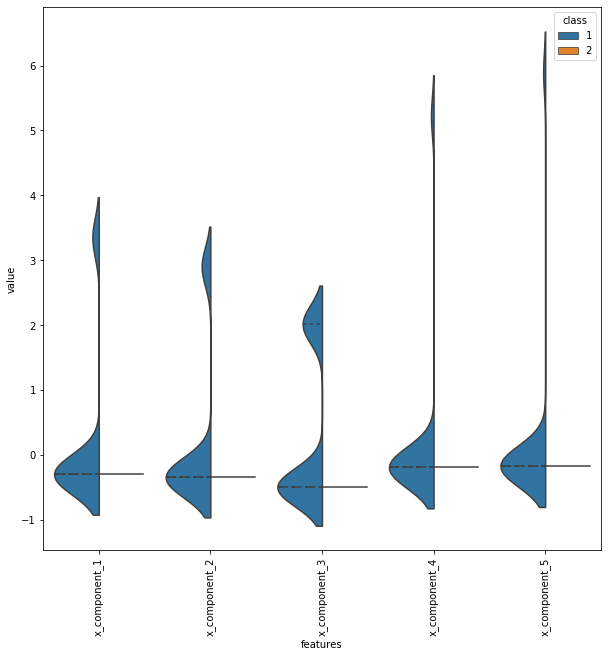

In [5]:

x_tmp = x


x_norm = (x_tmp - x_tmp.mean()) / x_tmp.std()


data = pd.concat([y,x_norm.iloc[:,-5:]],axis=1)

data = pd.melt(data,id_vars="class",
                    var_name="features",
                    value_name='value')



plt.figure(figsize =(10,10))

sns.violinplot(x = 'features',y = 'value',hue = 'class',data = data,split = True,inner='quart')

plt.xticks(rotation = 90)

plt.show()

# Detecting Outliers

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

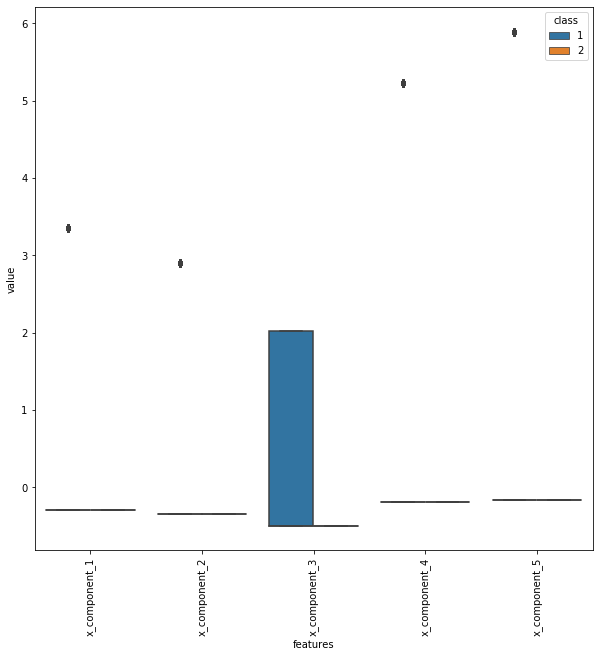

In [6]:

plt.figure(figsize =(10,10))
sns.boxplot(x = 'features',y = 'value',hue = 'class',data = data)
plt.xticks(rotation = 90)

In [8]:
from sklearn.ensemble import IsolationForest

ifc = IsolationForest()
yhat = ifc.fit_predict(x)

mask = yhat != -1

print(f'keeping {len(mask)} data points')



keeping 1358 data points


# No outliers found

# Upsampling Classes

# Dealing With Imbalance Classes 

In [15]:
train_data['class'].value_counts()

1    887
2    471
Name: class, dtype: int64

In [20]:



x = train_data.iloc[:,:-1].values
y = train_data.iloc[:,-1].values


counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE()
# under = RandomUnderSampler(sampling_strategy=0.22)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
# transform the dataset
new_x, new_y = pipeline.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(new_y)
print(counter)

Counter({1: 887, 2: 471})
Counter({1: 887, 2: 887})


# Feature Selection

In [33]:
# sns.set(style="whitegrid", palette="muted")

# plt.figure(figsize=(10,10))
# sns.swarmplot(x="features", y="value", hue="class", data=data)
# plt.xticks(rotation=90)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=7).fit(new_x,new_y)


print('Score list:', select_feature.scores_)
# print('Feature list:', new_x.columns)

Score list: [1.87919915e-02 1.30880976e-02 4.17975316e+00 6.57098254e+03
 1.85219262e+04 1.23303253e+04 2.15886992e+07 2.15890901e+07
 8.26136391e+05 8.25905780e+05 1.11000000e+02 1.44000000e+02
 2.68000000e+02 4.80000000e+01 3.80000000e+01]


In [32]:
train_data.iloc[:,:-1].columns[select_feature.get_support()]

Index(['xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area'], dtype='object')

In [39]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3,verbose = 1,n_features_to_select= None)
rfe = rfe.fit(new_x, new_y)

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


In [40]:
train_data.iloc[:,:-1].columns[rfe.get_support()]

Index(['thickness', 'xmin', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_3'],
      dtype='object')

# BaseLine Model

In [49]:
import xgboost as xgb 
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold




clf = XGBClassifier(n_estimators = 2000,
                   max_depth = 3,
                   learning_rate = 0.01,
                   gamma = 0.1   
                   )


folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_x):
    
    trainx,testx = new_x[trt],new_x[tst]
    trainy,testy = new_y[trt],new_y[tst]
    
    clf.fit(trainx,trainy)

    pred = clf.predict_proba(testx)

    print(log_loss(testy,pred))

#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)






0.23624711689067035
0.2859711149799257
0.28403020058873335
0.28220459278017074
0.24888360571303


# Creating New Features (Feature Engineering)

In [52]:
train_data.head(0)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class,Component


In [14]:
train_data['Component'] = train_data['x_component_1'] + train_data['x_component_2'] + \
                          train_data['x_component_3'] + train_data['x_component_4'] + \
                          train_data['x_component_5']  

In [7]:
train_data['Component'].value_counts()

0    749
1    609
Name: Component, dtype: int64

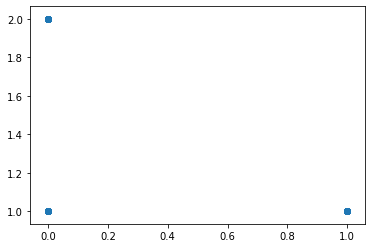

In [7]:
plt.scatter(train_data['Component'],train_data['class'])

In [8]:
np.corrcoef(train_data['Component'],train_data['class'])

array([[ 1.        , -0.65707717],
       [-0.65707717,  1.        ]])

In [35]:
np.var(train_data['Component'])

0.24734296949728984

In [36]:
train_data['grade_A_Component_2'].value_counts()

1    806
0    552
Name: grade_A_Component_2, dtype: int64

Correaltion between grade_A_Component_2 and Class

In [31]:
np.corrcoef(train_data['grade_A_Component_2'],train_data['class'])

array([[1.        , 0.01717343],
       [0.01717343, 1.        ]])

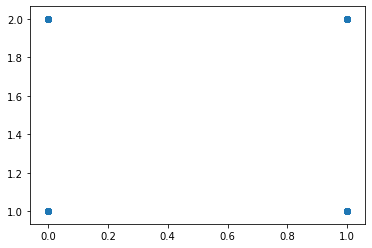

In [38]:
plt.scatter(train_data['grade_A_Component_2'],train_data['class'])

In [54]:
train_data.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'class', 'Component'],
      dtype='object')

# REarrange the dataframe columns

In [15]:
columns = ['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
           'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
           'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
           'x_component_5', 'Component','class']

feature_columns = ['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
                   'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
                   'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
                   'x_component_5', 'Component']

In [16]:
train_data = train_data[columns]
train_data.shape

(1358, 17)

In [107]:
from imblearn.over_sampling import SMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

new_x = train_data[feature_columns].values
# x = rfe.transform(x_bar)
print(new_x.shape)
new_y = train_data['class'].values
print(new_y.shape)


counter = Counter(new_y)
print(counter)
# define pipeline
over = SVMSMOTE()
# under = RandomUnderSampler(sampling_strategy=0.22)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
# transform the dataset
new_xs, new_ys = pipeline.fit_resample(new_x, new_y)
# summarize the new class distribution
counter = Counter(new_y)
print(counter)


(1358, 10)
(1358,)
Counter({1: 887, 2: 471})
Counter({1: 887, 2: 471})


# BaseLine Model

In [109]:



print(Counter(y))

clf = XGBClassifier(n_estimators = 2000,
                   max_depth = 3,
                   learning_rate = 0.01,
                  
                    
                 
                   
                   
                  )


folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_x):
    
    trainx,testx = new_x[trt],new_x[tst]
    trainy,testy = new_y[trt],new_y[tst]
    
    clf.fit(trainx,trainy)

    pred = clf.predict_proba(testx)

    print(log_loss(testy,pred))

#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)






Counter({1: 887, 2: 471})
0.27251681168276903
0.3317137857656609
0.318342639502482
0.2931707876290253
0.2798959031243374


In [110]:
clf.feature_importances_

array([0.10926031, 0.03550418, 0.04505388, 0.03077196, 0.02863433,
       0.03445433, 0.02067117, 0.02581935, 0.02292414, 0.6469064 ],
      dtype=float32)

In [17]:
feature_columns

['grade_A_Component_1',
 'grade_A_Component_2',
 'max_luminosity',
 'thickness',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'pixel_area',
 'log_area',
 'x_component_1',
 'x_component_2',
 'x_component_3',
 'x_component_4',
 'x_component_5',
 'Component']

# Predicting on Selected Features

In [61]:
feature_columns = ['grade_A_Component_1','max_luminosity','thickness',
                   'xmin','xmax','ymin','ymax','log_area','pixel_area',
                   'Component' ]


x = train_data[feature_columns].values
# x = rfe.transform(x_bar)
print(x.shape)
y = train_data['class'].values
print(y.shape)


counter = Counter(y)
print(counter)
# define pipeline
over = SVMSMOTE()
# under = RandomUnderSampler(sampling_strategy=0.22)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
# transform the dataset
new_xs, new_ys = pipeline.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(new_ys)
print(counter)


(1358, 10)
(1358,)
Counter({1: 887, 2: 471})
Counter({1: 887, 2: 887})


In [224]:
import pickle as pk

# pk.dump(x,open('x_f-9','wb'))
# pk.dump(y,open('y_f-9','wb'))


# pk.dump(new_xs,open('x_f-9_smot','wb'))
# pk.dump(new_ys,open('y_f-9_smot','wb'))


# Model Selection Phase

In [21]:
import xgboost as xgb 
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

print(new_xs.shape)
print(new_ys.shape)

clf = XGBClassifier(n_estimators = 1000,
                   max_depth = 3,
                   learning_rate = 0.01,
                  
                    
                 
                   
                   
                  )


folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_xs):
    
    trainx,testx = new_xs[trt],new_xs[tst]
    trainy,testy = new_ys[trt],new_ys[tst]
    
    clf.fit(trainx,trainy)

    pred = clf.predict_proba(testx)

    print(log_loss(testy,pred))

#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)






(1774, 9)
(1774,)
0.2500693299181261
0.28705961559079324
0.27402182805292885
0.286368617609563
0.2559548138902591


In [22]:
clf.feature_importances_

array([0.12438629, 0.03016216, 0.05257843, 0.02799264, 0.02021661,
       0.03596041, 0.02681584, 0.02535872, 0.65652883], dtype=float32)

# Using Logistic regression

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold


print(new_xs.shape)
clf2 = LogisticRegression(C = 10)


folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_xs):
    
    trainx,testx = new_xs[trt],new_xs[tst]
    trainy,testy = new_ys[trt],new_ys[tst]
    
    clf2.fit(trainx,trainy)

    pred = clf2.predict_proba(testx)

    print(log_loss(testy,pred))

#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)






(1774, 10)
0.6310429846114827
0.648856932655604
0.5921605737328949
0.5888861930479041
0.6745475300792825


c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

# SVM

In [180]:
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold


print(new_x.shape)

clf3 = SVC(C = 1000,probability = True)


folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_xs):
    
    trainx,testx = new_xs[trt],new_xs[tst]
    trainy,testy = new_ys[trt],new_ys[tst]
    
    clf3.fit(trainx,trainy)

    pred = clf3.predict_proba(testx)

    print(log_loss(testy,pred))

#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)






(1358, 9)
0.6415721102993253
0.6474499386536504
0.6298837357336923
0.6663001565417155
0.6779458381949283


# KNN

In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold


print(new_x.shape)

clf4 = KNeighborsClassifier(n_neighbors=10)


folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_xs):
    
    trainx,testx = new_xs[trt],new_xs[tst]
    trainy,testy = new_ys[trt],new_ys[tst]
    
    clf4.fit(trainx,trainy)

    pred = clf4.predict_proba(testx)

    print(log_loss(testy,pred))

#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)






(1358, 9)
0.7889176019529461
1.0296589015818312
0.7151395172194401
1.3963182531003535
0.9513878770827803


In [72]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold


print(new_xs.shape)
print(Counter(new_ys))

clf4 = ExtraTreesClassifier(n_estimators=300,random_state = 909)

score  = 0

folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_xs):
    
    trainx,testx = new_xs[trt],new_xs[tst]
    trainy,testy = new_ys[trt],new_ys[tst]
    
    clf4.fit(trainx,trainy)

    pred = clf4.predict_proba(testx)

    score += log_loss(testy,pred)
    
    print( log_loss(testy,pred))

#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)




print('avg',score/5)

(1774, 10)
Counter({1: 887, 2: 887})
0.19973969753333168
0.2530926820851792
0.2505279275303576
0.24017721846749987
0.2192248665438066
avg 0.23255247843203497


In [25]:
feature_columns

['grade_A_Component_1',
 'max_luminosity',
 'thickness',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'pixel_area',
 'Component']

In [33]:
clf4.feature_importances_

array([0.04146037, 0.05500932, 0.09727246, 0.06133266, 0.05876076,
       0.07112559, 0.06921025, 0.06889893, 0.47692966])

# RandomForest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold


print(new_xs.shape)

clf5 = RandomForestClassifier(n_estimators=300)
score = 0

folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_xs):
    
    trainx,testx = new_xs[trt],new_xs[tst]
    trainy,testy = new_ys[trt],new_ys[tst]
    
    clf5.fit(trainx,trainy)

    pred = clf5.predict_proba(testx)

    print(log_loss(testy,pred))
    score += log_loss(testy,pred)
#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)


print('avg',score / 5)



(1774, 10)
0.20158129906797959
0.26049560288354173
0.2628864184085086
0.2516152796935962
0.24090636620818473
avg 0.24349699325236215


# Adaboost

In [166]:
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold


print(new_xs.shape)

clf6 = AdaBoostClassifier(base_estimator=RandomForestClassifier())


folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_xs):
    
    trainx,testx = new_xs[trt],new_xs[tst]
    trainy,testy = new_ys[trt],new_ys[tst]
    
    clf6.fit(trainx,trainy)

    pred = clf6.predict_proba(testx)

    print(log_loss(testy,pred))

#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)






(1774, 10)
0.20483995358846935
0.2598852938288967
0.26511295872759977
0.26336330893648036
0.22462363203775856


# VoterClassifier

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


score = 0

vc = VotingClassifier(estimators=[('xgb',clf),('etc',clf4),('rf',clf5)],voting = 'soft')


folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_xs):
    
    trainx,testx = new_xs[trt],new_xs[tst]
    trainy,testy = new_ys[trt],new_ys[tst]
    
    vc.fit(trainx,trainy)

    pred = vc.predict_proba(testx)
    pred_class = vc.predict(testx)

    score += log_loss(testy,pred)
    
    print(accuracy_score(testy,pred_class))


print(score/5)

0.9352112676056338
0.8873239436619719
0.8732394366197183
0.8929577464788733
0.903954802259887
0.23327087212864123


# Stacking 

In [174]:
from sklearn.ensemble import StackingClassifier

estimators = [('etc',clf4),('rf',clf5),('ada',clf6)]
final_est = LogisticRegression(C = 10)

stackclf = StackingClassifier(estimators=estimators,final_estimator=final_est,stack_method = 'predict_proba',verbose = 1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_xs, new_ys, random_state=42)



stackclf.fit(X_train,y_train)

pred = stackclf.predict_proba(X_test)
print(log_loss(y_test,pred))
print(stackclf.score(X_test,y_test))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


0.24720147918054072
0.8828828828828829


# Selecting ExtraTreeClassifier highest position : 10 / 200
# HyberParameter Optimisation

# params to consider for tunning 

1. n_estimators
2. criterion  value = ['gini,'entropy']
3. max_depth  
4. min_sample_split - used for splitting 
5. min samples_leaf - used for splitting
6. max features - not of features to consider while looking for splitting 
7. max_leaf_nodes
8. max_samples


In [82]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [100]:
"""
random search
grid search
"""
ExtraTreesClassifier?

In [118]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

scoring = 'neg_log_loss'
n_jobs = -1
cv = 5

parm = {'n_estimators': list(range(100,1000,100)),
        'criterion':['gini','entropy'],
        'max_depth':list(range(0,30,2)),
        'min_samples_split':list(range(1,5)),
        'max_features':['auto','log2',None,2,4],
        'max_samples' : [None,100,300,500,600,700,900]
        
        }

estimator = ExtraTreesClassifier(random_state = 9099)

random_grid = RandomizedSearchCV(estimator=estimator,
                                 param_distributions=parm,
                                 n_iter = 700,
                                 scoring = scoring,
                                 n_jobs = n_jobs,
                                 cv = cv,
                                 random_state = 909,
                                 verbose = 1
                                )



random_grid.fit(new_xs,new_ys)


Fitting 5 folds for each of 700 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed: 14.5min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=9099),
                   n_iter=700, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28],
                                        'max_features': ['auto', 'log2', None,
                                                         2, 4],
                                        'max_samples': [None, 100, 300, 500,
                                                        600, 700, 900],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
     

In [121]:
random_grid.best_score_

-0.2384925748146675

In [88]:
#parametres at 50 its 
random_grid.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 4,
 'max_depth': 24}

# params at 1500 fits

In [114]:
random_grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_samples': 500,
 'max_features': 4,
 'max_depth': 26,
 'criterion': 'entropy'}

params at 2500 fits

In [117]:
random_grid.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'max_samples': 900,
 'max_features': None,
 'max_depth': 22,
 'criterion': 'entropy'}

params at 3500 fits

In [120]:
random_grid.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'max_samples': 900,
 'max_features': None,
 'max_depth': 22,
 'criterion': 'entropy'}

# Grid Search

In [126]:
from sklearn.model_selection import GridSearchCV

scoring = 'neg_log_loss'
n_jobs = -1
cv = 5

parm_grid = {'n_estimators': [600,700,750,800],
        'criterion':['gini','entropy'],
        'max_depth':[None,21,22,23],
        'min_samples_split':[1,2,3],
        'max_features':[None,2],
        'max_samples' : [None,800,900,1050]
        
        }

estimator = ExtraTreesClassifier(random_state = 9099)


grid_search = GridSearchCV(estimator= estimarot,
                           param_grid=parm_grid,
                           scoring = scoring,
                           n_jobs = n_jobs,
                           verbose = 1,
                           cv = cv)
grid_search.fit(new_xs,new_ys)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 26.7min finished


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 21, 22, 23],
                         'max_features': [None, 2],
                         'max_samples': [None, 800, 900, 1050],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [600, 700, 750, 800]},
             scoring='neg_log_loss', verbose=1)

In [127]:
grid_search.best_score_

-0.23810863905019602

In [128]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'max_features': None,
 'max_samples': 1050,
 'min_samples_split': 2,
 'n_estimators': 600}

In [140]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold


print(new_xs.shape)
print(Counter(new_ys))

clf4_tuned = ExtraTreesClassifier(**grid_search.best_params_,random_state = 9099)

score  = 0

folds = KFold(n_splits = 5,shuffle = True,random_state=999)
for trt,tst in folds.split(new_xs):
    
    trainx,testx = new_xs[trt],new_xs[tst]
    trainy,testy = new_ys[trt],new_ys[tst]
    
    clf4_tuned.fit(trainx,trainy)

    pred = clf4_tuned.predict_proba(testx)

    score += log_loss(testy,pred)
    
    print( log_loss(testy,pred))

#     print(max(0,1- np.sqrt(mean_squared_error(pred,testy))) * 100)




print('avg',score/5)

(1774, 10)
Counter({1: 887, 2: 887})
0.17810878928539411
0.2492018240042685
0.24542926569096912
0.22963737989117977
0.20832331528791853
avg 0.222140114831946


# score went from 0.2582 -> 0.2566

# Predicting on Test Data

In [130]:
test_data = pd.read_csv('Test.csv')
test_data['Component'] = test_data['x_component_1'] + test_data['x_component_2'] + \
                         test_data['x_component_3'] + test_data['x_component_4'] + \
                         test_data['x_component_5']  

In [143]:
len(test_data)

583

In [131]:
test_data['Component'].value_counts()

0    326
1    257
Name: Component, dtype: int64

In [132]:
test_data.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'Component'],
      dtype='object')

In [133]:
feature_columns

['grade_A_Component_1',
 'max_luminosity',
 'thickness',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'log_area',
 'pixel_area',
 'Component']

In [134]:
test_data = test_data[feature_columns]
test_data.shape

(583, 10)

In [136]:
test_preds = clf4_tuned.predict_proba(test_data.values)
print(clf4_tuned)
sub_file = pd.read_excel('Sample_Submission.xlsx')
sub_file.head()

ExtraTreesClassifier(criterion='entropy', max_depth=22, max_features=None,
                     max_samples=1050, n_estimators=600, random_state=9099)


,1,2
0,0.600493,0.399507
1,0.532010,0.467990
2,0.892149,0.107851
3,0.694834,0.305166
4,0.740557,0.259443


In [137]:
sub_file.iloc[:,:] = test_preds
sub_file.head()

,1,2
0,1.000000,0.000000
1,0.068333,0.931667
2,1.000000,0.000000
3,1.000000,0.000000
4,0.711807,0.288193


In [138]:
sub_file.to_excel('ExtreeClf_tuned.xlsx')